In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Least squares and linear basis functions models
## Least squares

In [15]:
def compute_cost_MSE(y, tx, beta):
    """compute the loss by mse."""
    e = y - tx.dot(beta)
    mse = e.dot(e) / (2 * len(e))
    return mse
def compute_cost_MAE(y, tx, w):
    y = np.array(y)
    return np.sum(abs(y - np.dot(tx, w))) / y.shape[0]

def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    weight = np.linalg.solve(np.dot(tx.T,tx), np.dot(tx.T,y))
    return least_square_mse(y,tx, weight),weight
    
def least_square_mse(y, tx, w):
    return compute_cost_MSE(y, tx, w)

def rmse(y, tx, w):
    return np.sqrt(compute_cost_MSE)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    mse, lsq_w = least_squares(y,tx)
    print(lsq_w)

test_your_least_squares()

/Users/kyu/BaiduYun/Dropbox/EPFL/2016-2017Sem1/PRML/lab/ML_course/labs/ex03/template
[ 73.293922    13.47971243]


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [4]:
# load dataset
x, y = load_data()

print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    x = np.array(x)
    res = x
    for d in range(2, degree + 1):
        res = np.concatenate((res, x ** d), axis=-1)
    # print(len(x),degree)
    # print(res)
    res = np.reshape(res, (degree, len(x)))
    res = np.c_[np.ones((len(res.T), 1)),res.T]
    return res

def build_poly2(x, degree):
    """polynomial basis function."""
    X = np.ones((x.shape[0], degree + 1))
    for i in range(degree):
        X[:, i + 1:degree + 1] *= x[:, np.newaxis]
    return X

In [9]:
test = np.array(range(10))
build_poly2(test,2)

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.]])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907422
Processing 4th experiment, degree=12, rmse=0.24077021772310203


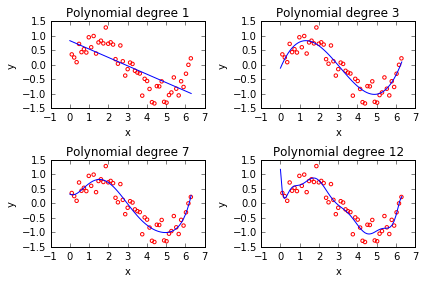

In [16]:
from plots import *
# from .build_polynomial import * 

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        x_degree = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        lsq_degree, weight = least_squares(y,x_degree)
#         print(weight)
        rmse = np.sqrt(2*lsq_degree)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [10]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    # Random shuffle the index by enumerate.
    pair = np.c_[x,y]
    np.random.shuffle(pair)
    index = np.round(x.size * ratio,0).astype('int16')
    p1, p2 = np.split(pair,[index])
    x1,y1 = zip(*p1)
    x2,y2 = zip(*p2)
    return x1,y1,x2,y2

def split_data2(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)

    ntr     = round(y.shape[0] * ratio)
    ind     = np.random.permutation(range(y.shape[0]))

    x_tr    = x[ind[:ntr]]
    x_te    = x[ind[ntr:]]
    y_tr    = y[ind[:ntr]]
    y_te    = y[ind[ntr:]]

    return (x_tr, y_tr , x_te , y_te)

test_x = np.array( range(0,10))
test_y = np.array(range(0,10))
print(split_data(test_x, test_y, 0.5))
print(split_data2(test_x, test_y, 0.5))

((2, 9, 6, 4, 0), (2, 9, 6, 4, 0), (3, 1, 7, 8, 5), (3, 1, 7, 8, 5))
(array([2, 9, 6, 4, 0]), array([2, 9, 6, 4, 0]), array([3, 1, 7, 8, 5]), array([3, 1, 7, 8, 5]))


Then, test your `split_data` function below.

In [70]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    trainX,trainY,testX,testY = split_data(x,y,ratio,seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    #     print(len(trainX))
    # trainX = np.c_[np.ones((len(trainX),1)), build_poly(trainX,degree)]
    # testX = np.c_[np.ones((len(testX),1)), build_poly(testX,degree)]
    trainX = build_poly(trainX, degree)
    testX = build_poly(testX, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse, weight = least_squares(trainY,trainX)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    mse_test = np.sum((testY-np.dot(testX,weight))**2)/len(testY)
    rmse_tr = np.sqrt(2*mse)
    rmse_te = np.sqrt(2*mse_test)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1,3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.256
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.292
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.311
proportion=0.9, degree=12, Training RMSE=0.243, Testing RMSE=0.360
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.751
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.419
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.402
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=2.119
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.755
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.650
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.805
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=8.085


# Ridge Regression
Please fill in the function below.

In [11]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    # Hes = tx.T * tx + 2*N*lambda * I_m
    G = np.eye(tx.shape[1])
    G[0,0] = 0
    hes = np.dot(tx.T,tx) + lamb * G
    weight = np.linalg.solve(hes,np.dot(tx.T,y))
    mse = compute_cost_MSE(y, tx, weight)
    return mse,weight

lambda=0, proportion=0.5, degree=7, weight=8, Training RMSE=0.217, Testing RMSE=0.323
lambda=1, proportion=0.5, degree=7, weight=8, Training RMSE=0.224, Testing RMSE=0.305
lambda=2, proportion=0.5, degree=7, weight=8, Training RMSE=0.231, Testing RMSE=0.295
lambda=3, proportion=0.5, degree=7, weight=8, Training RMSE=0.234, Testing RMSE=0.291
lambda=4, proportion=0.5, degree=7, weight=8, Training RMSE=0.236, Testing RMSE=0.288
lambda=5, proportion=0.5, degree=7, weight=8, Training RMSE=0.238, Testing RMSE=0.286
lambda=6, proportion=0.5, degree=7, weight=8, Training RMSE=0.240, Testing RMSE=0.281
lambda=7, proportion=0.5, degree=7, weight=8, Training RMSE=0.246, Testing RMSE=0.276
lambda=8, proportion=0.5, degree=7, weight=8, Training RMSE=0.260, Testing RMSE=0.279
lambda=9, proportion=0.5, degree=7, weight=8, Training RMSE=0.276, Testing RMSE=0.289
[0.32307480932806149, 0.30495152466023245, 0.29531395286497653, 0.29095368274442795, 0.28831981102132753, 0.28552880025875027, 0.28096413912

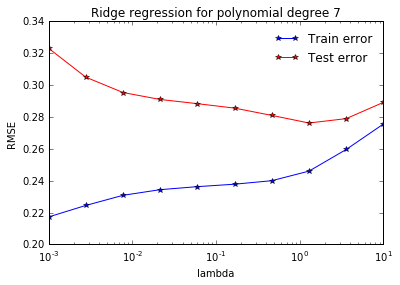

In [24]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-3, 1, 10)   
    
    trainX,trainY,testX,testY = split_data(x,y,ratio,seed)
    trainX = build_poly(trainX,degree)
    testX =  build_poly(testX,degree)
    
    _rmse_te = []
    _rmse_tr = []
    
      # define the structure of figure
#     num_row = 6
#     num_col = 2
#     f, axs = plt.subplots(num_row, num_col)


    
    for ind, lamb in enumerate(lambdas):
        mse, weight = ridge_regression(trainY,trainX,lamb)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # calculate RMSE for train and test data,
        # and store them in rmse_tr and rmse_te respectively: TODO
        # ***************************************************
        mse_test = compute_cost_MSE(testY, testX, weight)
        rmse_tr = np.sqrt(2*mse)
        rmse_te = np.sqrt(2*mse_test)
        _rmse_te.append(rmse_te)
        _rmse_tr.append(rmse_tr)
        print("lambda={l}, proportion={p}, degree={d}, weight={w}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
              l=ind, p=ratio, d=degree, w=len(weight), tr=rmse_tr, te=rmse_te))
        # plot fit
#         plot_fitted_curve(
#             y, x, weight, degree, axs[ind // num_col][ind % num_col])

        
    print(_rmse_te, _rmse_tr)
#     plt.hold(False)
#     rmse_tr_plt, = plt.plot(lambdas, _rmse_tr, 's-b', label="train error")
#     plt.semilogx()
#     plt.hold(True)
#     rmse_te_plt, = plt.plot(lambdas, _rmse_te, 's-r', label="test error")
#     plt.xlabel('lambda')
#     plt.ylabel('rmse')
#     plt.title('ridge regression for polynomial degree {deg}'.format(deg=degree))
#     plt.legend(handles=[rmse_tr_plt, rmse_te_plt])
#     plt.show()
    plot_train_test(_rmse_tr, _rmse_te, lambdas, degree)
seed = 11
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

In [ ]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [7]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        x_degree = build_poly(x,degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        lsq_degree, weight = least_squares(y,x_degree)
#         print(weight)
        rmse = np.sqrt(2*lsq_degree)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()